In [3]:
!unzip -q "/content/drive/MyDrive/Teeth DataSet.zip" -d "/content/data"

In [5]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [7]:
from tensorflow import keras

In [8]:
pretrained_resnet50 = keras.applications.resnet50.ResNet50(weights='imagenet' , include_top = True)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
train_dir = "/content/data/Teeth_Dataset/Training"
test_dir = "/content/data/Teeth_DataSet/Testing"
valid_dir = "/content/data/Teeth_DataSet/Validation"

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagegenrator = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)



In [11]:
val_imagegenrator = ImageDataGenerator(
    rescale = 1/255.0
)

In [14]:
batch_size = 32
target_size = (224,224)


train_path = "/content/data/Teeth_Dataset/Training"
valid_path = "/content/data/Teeth_Dataset/Validation"

train_generator = train_imagegenrator.flow_from_directory(
    train_path,
    target_size = target_size,
    batch_size = batch_size,
    class_mode = 'binary'
)


val_generator = val_imagegenrator.flow_from_directory(
    valid_path,
    target_size = target_size,
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [16]:
import matplotlib.pyplot as plt

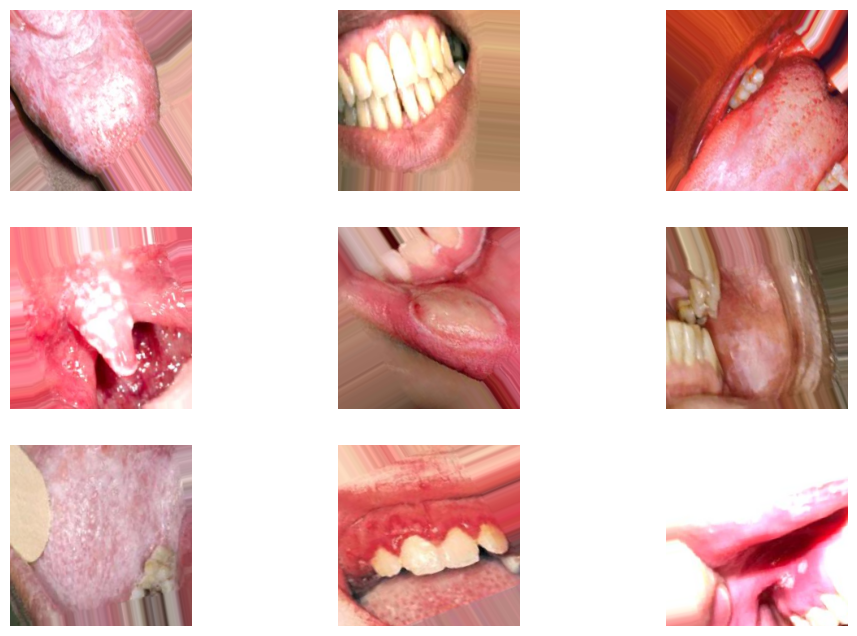

In [18]:
augmented_image , label = next(train_generator)

plt.figure(figsize = (12,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[i])
  plt.axis('off')

In [19]:
pretrained_base_model = keras.applications.Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [23]:
for layer in pretrained_base_model.layers:
  layer.trainable = False

In [24]:
import tensorflow as tf

In [38]:
pretrained_base_model.trainable = True

In [39]:
inputs = tf.keras.Input(shape = (224,224,3))


x = pretrained_base_model(inputs,training = False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs,outputs)

In [40]:
len(pretrained_base_model.layers)

132

In [41]:
for layer in pretrained_base_model.layers[:100]:
  layer.trainable = False

In [42]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [44]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-5),
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)


In [46]:
batch_size = 32

train_steps = 3087//batch_size
val_steps = 1028//batch_size

history = model.fit(
    train_generator,
    # steps_per_epoch = train_steps,
    epochs = 150,
    validation_data = val_generator,
    # validation_steps = val_steps
)

Epoch 1/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 460ms/step - accuracy: 0.1484 - loss: -11.8700 - val_accuracy: 0.1449 - val_loss: -12.0306
Epoch 2/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 85s 497ms/step - accuracy: 0.1499 - loss: -12.3040 - val_accuracy: 0.1449 - val_loss: -12.7498
Epoch 3/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 47s 484ms/step - accuracy: 0.1474 - loss: -13.6295 - val_accuracy: 0.1449 - val_loss: -13.4666
Epoch 4/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 463ms/step - accuracy: 0.1619 - loss: -14.1734 - val_accuracy: 0.1449 - val_loss: -14.1819
Epoch 5/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 462ms/step - accuracy: 0.1552 - loss: -14.6223 - val_accuracy: 0.1449 - val_loss: -14.9073
Epoch 6/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 462ms/step - accuracy: 0.1418 - loss: -16.0604 - val_accuracy: 0.1449 - val_loss: -15.6332
Epoch 7/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 467ms/step - accuracy: 0.1402 - loss: -16.4871 - val_accuracy: 0.1449 - val_loss: -16.3503
Epoch 8/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 48s 493ms/step - accura